In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Setting up income and tax dataframe

median_income_tax_path = "Project Data/Median HH Income & State Tax_2016-2017.csv"

median_income_tax_df = pd.read_csv(median_income_tax_path,encoding = "utf-8")

# Setting up population migration dataframe

population_migration_path = "Project Data/US State-to-State Migration_2016-2017.csv"

population_migration_df = pd.read_csv(population_migration_path,encoding = "utf-8")


In [3]:
merged_df = pd.merge(population_migration_df,median_income_tax_df,on="State")
pop_taxes_income = merged_df.set_index('State')
pop_taxes_income.head()

,16 - '17 Outmigration,16 - '17 Inmigration,Net Migration,Median_Income,State Income Tax,Total Change in Income,Percent Change in Income,Avg. Yearly Change
State,,,,,,,,
Alabama,101466,111803,10337,46472,0.0500,9003,0.220,0.027
Alaska,42972,30199,-12773,76114,0.0000,10886,0.188,0.024
Arizona,163214,261727,98513,53510,0.0454,15387,0.328,0.041
Arkansas,69850,79411,9561,43813,0.0690,11194,0.290,0.036
California,661026,523131,-137895,67169,0.1330,16206,0.299,0.037


In [4]:
top_ten = pop_taxes_income.sort_values(['Net Migration'],ascending=False)
top_df = top_ten.head(10)
top_df

,16 - '17 Outmigration,16 - '17 Inmigration,Net Migration,Median_Income,State Income Tax,Total Change in Income,Percent Change in Income,Avg. Yearly Change
State,,,,,,,,
Florida,447586,566476,118890,50883,0.0000,10578,0.240,0.030
Arizona,163214,261727,98513,53510,0.0454,15387,0.328,0.041
Washington,198813,260787,61974,66174,0.0000,23563,0.420,0.052
Texas,467338,524511,57173,57051,0.0000,12519,0.265,0.033
Oregon,109454,149513,40059,56119,0.0990,18563,0.367,0.046
Tennessee,155665,191909,36244,48708,0.0300,17469,0.453,0.057
Nevada,98226,133074,34848,55434,0.0000,10664,0.208,0.026
Colorado,194296,226933,32637,65458,0.0463,12801,0.213,0.027
Georgia,254956,278889,23933,52977,0.0600,11704,0.265,0.033


In [5]:
bottom_ten = pop_taxes_income.sort_values(['Net Migration'],ascending=True)
bottom_df = bottom_ten.head(10)
bottom_df

,16 - '17 Outmigration,16 - '17 Inmigration,Net Migration,Median_Income,State Income Tax,Total Change in Income,Percent Change in Income,Avg. Yearly Change
State,,,,,,,,
Illinois,339435,195092,-144343,61229,0.0495,19417,0.383,0.048
California,661026,523131,-137895,67169,0.1330,16206,0.299,0.037
Louisiana,102212,72836,-29376,46710,0.0600,10673,0.272,0.034
Massachusetts,173033,146299,-26734,74167,0.0510,25411,0.417,0.052
Hawaii,66597,46457,-20140,74923,0.1100,20569,0.345,0.043
Maryland,183900,165654,-18246,78916,0.0575,22022,0.343,0.043
Connecticut,98971,83325,-15646,73781,0.0699,6814,0.103,0.013
Kansas,99660,86154,-13506,55477,0.0570,17884,0.388,0.049
Alaska,42972,30199,-12773,76114,0.0000,10886,0.188,0.024


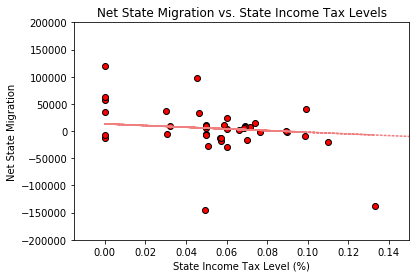

In [7]:
# Net State Migration vs. State Income Tax Levels

plt.title("Net State Migration vs. State Income Tax Levels")
plt.xlabel("State Income Tax Level (%)")
plt.ylabel("Net State Migration")

plt.scatter(merged_df['State Income Tax'],merged_df['Net Migration'], marker="o", color="red",edgecolors='black')

plt.ylim(-200000,200000)
plt.xlim(-0.015,0.15)

# Plot a line of best fit or "trend" line

z = np.polyfit(merged_df['State Income Tax'], merged_df['Net Migration'], 1)
p = np.poly1d(z)
plt.plot(merged_df['State Income Tax'],p(merged_df['State Income Tax']),linestyle=":",color='lightcoral')

# Save the Figure
plt.savefig("Images/Migration&Taxes.png")
plt.show()

In [8]:
pop_growth = top_df['Net Migration']
pop_growth_lst = pop_growth.tolist()
pop_growth_lst

[118890, 98513, 61974, 57173, 40059, 36244, 34848, 32637, 23933, 14945]

In [9]:
sorted_top = merged_df.sort_values(['Net Migration'],ascending=False)
sorted_top_ten = sorted_top.head(10)
sorted_top_state = sorted_top_ten['State']
sorted_top_lst = sorted_top_state.tolist()
sorted_top_lst

['Florida',
 'Arizona',
 'Washington',
 'Texas',
 'Oregon',
 'Tennessee',
 'Nevada',
 'Colorado',
 'Georgia',
 'Idaho']

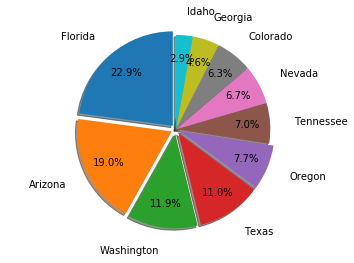

In [11]:
# Pie Chart for Net Migration Share Between Top Ten States

explode2 = (0.05,0.05,0.05,0.05,0.05,0,0,0,0,0)

plt.pie(pop_growth_lst, labels=sorted_top_lst, colors=None,explode=explode2,
        labeldistance=1.25,autopct="%1.1f%%",pctdistance=0.75, shadow=True, startangle=90)
plt.axis("equal")

# Save the Figure
plt.savefig("Images/TopTenPie.png")
plt.show()

In [12]:
pop_decline = bottom_df['Net Migration']
pop_decline_lst = pop_decline.tolist()
pop_decline_lst2 = []
for num in pop_decline_lst:
    pop_decline_lst2.append(num*-1)
pop_decline_lst2.remove(13506)
pop_decline_lst2.remove(15646)
pop_decline_lst2.remove(18246)
pop_decline_lst2.append(47398)
pop_decline_lst2

[144343, 137895, 29376, 26734, 20140, 12773, 12073, 47398]

In [13]:
sorted_bottom = merged_df.sort_values(['Net Migration'],ascending=True)
sorted_bottom_ten = sorted_bottom.head(10)
sorted_bottom_state = sorted_bottom_ten['State']
sorted_bottom_lst = sorted_bottom_state.tolist()
sorted_bottom_lst.remove('Kansas')
sorted_bottom_lst.remove('Connecticut')
sorted_bottom_lst.remove('Maryland')
sorted_bottom_lst.append('KS/MD/CT')
sorted_bottom_lst

['Illinois',
 'California',
 'Louisiana',
 'Massachusetts',
 'Hawaii',
 'Alaska',
 'Virginia',
 'KS/MD/CT']

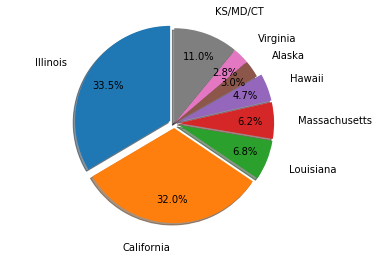

In [14]:
# Pie Chart for Net Migration Share Between Top Ten States

explode2 = (0.05,0.05,0.05,0.05,0.05,0,0,0)

plt.pie(pop_decline_lst2, labels=sorted_bottom_lst, colors=None,explode=explode2,
        labeldistance=1.25,autopct="%1.1f%%",pctdistance=0.75, shadow=True, startangle=90)
plt.axis("equal")

# Save the Figure
plt.savefig("Images/BottomTenPie.png")
plt.show()

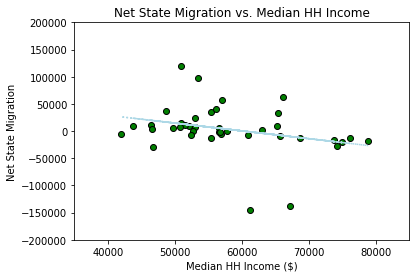

In [15]:
# Net State Migration vs. State Income Tax Levels

plt.title("Net State Migration vs. Median HH Income")
plt.xlabel("Median HH Income ($)")
plt.ylabel("Net State Migration")

plt.scatter(merged_df['Median_Income'],merged_df['Net Migration'], marker="o", color="green",edgecolors='black')

plt.ylim(-200000,200000)
plt.xlim(35000,85000)

# Plot a line of best fit or "trend" line

z = np.polyfit(merged_df['Median_Income'], merged_df['Net Migration'], 1)
p = np.poly1d(z)
plt.plot(merged_df['Median_Income'],p(merged_df['Median_Income']),linestyle=":",color='lightblue')

# Save the Figure
plt.savefig("Images/Migration&Income.png")
plt.show()

In [16]:
Top_Inc_Change = merged_df.sort_values(['Percent Change in Income'],ascending=False)
Top_Five_Inc_Change = Top_Inc_Change.head(5)
Top_Five_Inc_Change

,State,16 - '17 Outmigration,16 - '17 Inmigration,Net Migration,Median_Income,State Income Tax,Total Change in Income,Percent Change in Income,Avg. Yearly Change
32,Tennessee,155665,191909,36244,48708,0.0300,17469,0.453,0.057
37,Washington,198813,260787,61974,66174,0.0000,23563,0.420,0.052
20,Massachusetts,173033,146299,-26734,74167,0.0510,25411,0.417,0.052
14,Iowa,79358,77072,-2286,56570,0.0898,19702,0.402,0.050
25,Montana,28012,35456,7444,50801,0.0690,16399,0.397,0.050


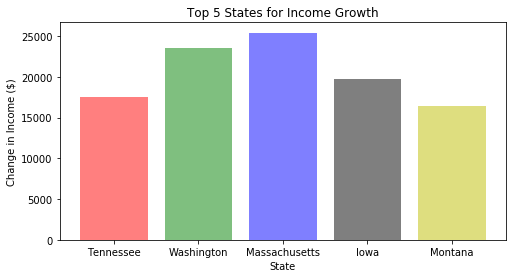

In [17]:
plt.figure(figsize=(8,4))

my_colors = 'rgbkymc' 
plt.bar(Top_Five_Inc_Change['State'], Top_Five_Inc_Change['Total Change in Income'],color=my_colors , alpha=0.5, align="center")

# Give our chart some labels and a tile
plt.title("Top 5 States for Income Growth")
plt.xlabel("State")
plt.ylabel("Change in Income ($)")


# Save the Figure
plt.savefig("Images/TopFiveInc.png")
plt.show()

In [18]:
Bottom_Inc_Change = merged_df.sort_values(['Percent Change in Income'],ascending=True)
Bottom_Five_Inc_Change = Bottom_Inc_Change.head(5)
Bottom_Five_Inc_Change

,State,16 - '17 Outmigration,16 - '17 Inmigration,Net Migration,Median_Income,State Income Tax,Total Change in Income,Percent Change in Income,Avg. Yearly Change
6,Connecticut,98971,83325,-15646,73781,0.0699,6814,0.103,0.013
23,Mississippi,78043,73549,-4494,42009,0.0500,4621,0.121,0.015
7,Delaware,35653,38532,2879,63036,0.0660,9798,0.177,0.022
1,Alaska,42972,30199,-12773,76114,0.0000,10886,0.188,0.024
39,Wyoming,25954,18511,-7443,60938,0.0000,10338,0.198,0.025


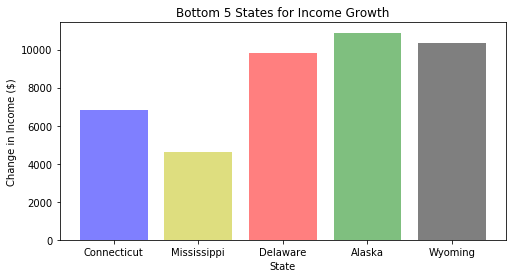

In [19]:
plt.figure(figsize=(8,4))
my_colors = 'byrgkg' 
plt.bar(Bottom_Five_Inc_Change['State'], Bottom_Five_Inc_Change['Total Change in Income'], color=my_colors, alpha=0.5, align="center")

# Give our chart some labels and a tile
plt.title("Bottom 5 States for Income Growth")
plt.xlabel("State")
plt.ylabel("Change in Income ($)")

# Save the Figure
plt.savefig("Images/BottomFiveInc.png")
plt.show()

In [20]:
# Setting up Rent dataframe

Rents_path = "Project Data/2BR Rents_Per State.csv"

Rents_df = pd.read_csv(Rents_path,encoding = "utf-8")


In [21]:
merged_df3 = pd.merge(population_migration_df,Rents_df,left_index=True,right_index=True)
merged_df3.head()

,State,16 - '17 Outmigration,16 - '17 Inmigration,Net Migration,2010,2011,2012,2013,2014,2015,2016,2017,2018,% Change in Rent,Y/Y rent change
0,Alabama,101466,111803,10337,681,697,713,730,747,765,783,801,820,0.2046,0.023
1,Alaska,42972,30199,-12773,1172,1174,1177,1179,1182,1184,1186,1189,1191,0.0161,0.002
2,Arizona,163214,261727,98513,819,849,879,911,944,979,1014,1051,1089,0.3298,0.035
3,Arkansas,69850,79411,9561,684,689,695,700,706,712,717,723,729,0.0664,0.008
4,California,661026,523131,-137895,1713,1728,1744,1760,1776,1792,1808,1824,1841,0.0750,0.009


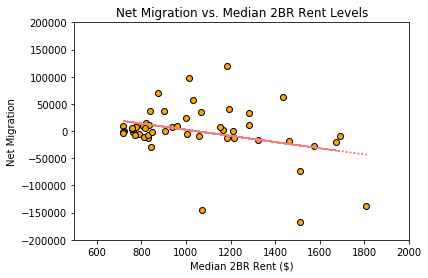

In [22]:
# State Migration vs. 2BR Median Rent Levels

plt.title("Net Migration vs. Median 2BR Rent Levels")
plt.xlabel("Median 2BR Rent ($)")
plt.ylabel("Net Migration")

plt.ylim(-200000,200000)
plt.xlim(500,2000)

plt.scatter(merged_df3['2016'],merged_df3['Net Migration'], marker="o", color="orange",edgecolors='black')

z = np.polyfit(merged_df3['2016'], merged_df3['Net Migration'], 1)
p = np.poly1d(z)
plt.plot(merged_df3['2016'],p(merged_df3['2016']),linestyle=":",color='lightcoral')


# Save the Figure
plt.savefig("Images/Migration&Rent.png")
plt.show()

In [23]:
Top_Rents = merged_df3.sort_values(['2016'],ascending=False)
Top_Five_Rents = Top_Rents.head(10)
Top_Five_Rents

,State,16 - '17 Outmigration,16 - '17 Inmigration,Net Migration,2010,2011,2012,2013,2014,2015,2016,2017,2018,% Change in Rent,Y/Y rent change
4,California,661026,523131,-137895,1713,1728,1744,1760,1776,1792,1808,1824,1841,0.0750,0.009
8,District of Columbia,65018,56231,-8787,1553,1575,1597,1620,1643,1666,1690,1714,1738,0.1194,0.014
11,Hawaii,66597,46457,-20140,1537,1559,1581,1604,1627,1650,1673,1697,1721,0.1194,0.014
21,Massachusetts,173033,146299,-26734,1387,1417,1447,1478,1510,1543,1576,1609,1644,0.1851,0.021
30,New Jersey,224961,152106,-72855,1423,1437,1452,1466,1481,1496,1511,1527,1542,0.0837,0.010
32,New York,452580,285252,-167328,1447,1458,1468,1478,1489,1499,1510,1520,1531,0.0578,0.007
20,Maryland,183900,165654,-18246,1280,1309,1338,1368,1399,1430,1462,1495,1529,0.1948,0.022
47,Washington,198813,260787,61974,1294,1316,1339,1362,1386,1410,1434,1459,1484,0.1470,0.017
6,Connecticut,98971,83325,-15646,1248,1260,1273,1286,1299,1312,1325,1338,1352,0.0837,0.010
29,New Hampshire,41740,52893,11153,1172,1190,1208,1227,1245,1264,1284,1303,1323,0.1285,0.015


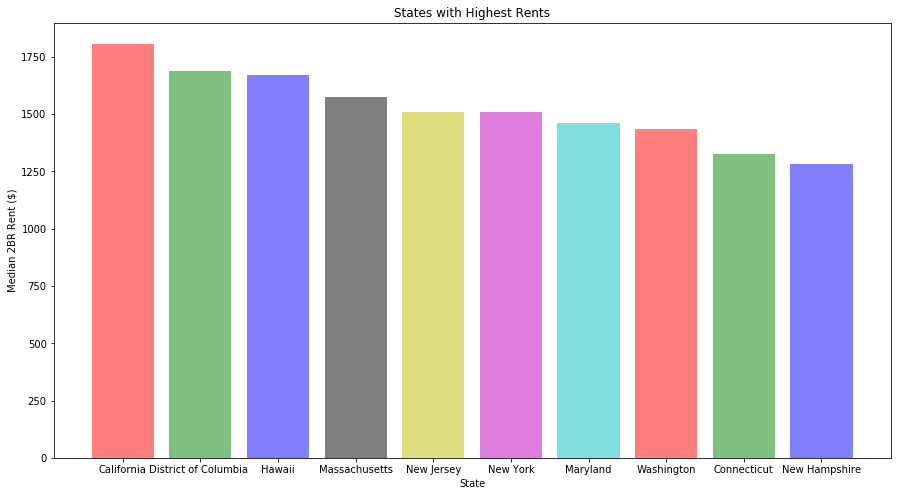

In [24]:
plt.figure(figsize=(15,8))

my_colors = 'rgbkymc' 
plt.bar(Top_Five_Rents['State'], Top_Five_Rents['2016'],color=my_colors , alpha=0.5, align="center")

# Give our chart some labels and a tile
plt.title("States with Highest Rents")
plt.xlabel("State")
plt.ylabel("Median 2BR Rent ($)")


# Save the Figure
plt.savefig("Images/TopTenRents.png")
plt.show()

In [25]:
# Setting up Rent dataframe

Question_path = "Project Data/Where are people migrating to.csv"

Question_df = pd.read_csv(Question_path,encoding = "utf-8")

Question_df2 = Question_df.set_index("State")
Question_df2.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,424,1513,517,2328,1974,336,22,378,14171,...,96,8018,8825,998,0,4277,1289,1070,1121,104
Alaska,942,0,1387,203,3556,1487,0,0,0,906,...,6,544,2165,465,0,360,3653,0,2500,6
Arizona,1337,2255,0,1763,59233,12810,730,810,362,8522,...,1458,2194,12793,8594,96,3593,14392,318,3897,997
Arkansas,574,241,1060,0,5334,2547,0,0,0,1525,...,0,5383,15767,657,0,1087,1539,0,958,12
California,3715,2606,26907,3471,0,25038,5935,491,6818,24611,...,1403,5413,40999,9925,895,21162,33143,789,9348,1395


In [26]:
Most_Decline_DF = Question_df2.loc[["Florida","Arizona","North Carolina","Washington","Texas","Oregon","South Carolina","Tennessee","Nevada","Colorado"],["New York","Illinois","California","New Jersey","Louisiana","Massachusetts","Hawaii","Maryland","Connecticut","Kansas"]]
Most_Decline_DF

,New York,Illinois,California,New Jersey,Louisiana,Massachusetts,Hawaii,Maryland,Connecticut,Kansas
State,,,,,,,,,,
Florida,63722,28631,30919,27892,6403,18212,2092,18907,11249,3376
Arizona,5674,13095,59233,4329,2174,2382,2651,1108,730,2506
North Carolina,27031,6013,22469,11559,3491,7605,1463,10899,5780,1590
Washington,6217,8848,52484,3702,2401,3690,4855,2623,1310,2249
Texas,20664,26214,63174,7460,28700,5502,6376,9793,2363,11649
Oregon,2491,4110,50109,475,1461,822,2671,1384,355,1298
South Carolina,11504,3918,7618,7658,1606,2607,298,3276,3427,826
Tennessee,5413,12376,7879,1209,2614,1109,334,1497,2013,1796
Nevada,2280,2737,47513,764,444,838,4231,1364,693,245


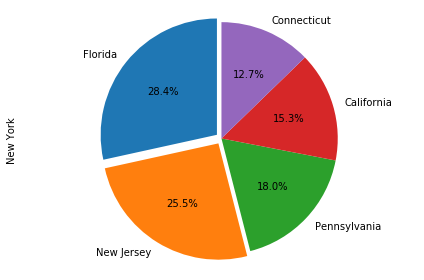

In [27]:
NY_df = Question_df2["New York"]
NY_df2 = NY_df.sort_values(ascending=False)
NY_df3 = NY_df2.head(5)

NY_df3.plot.pie(y=NY_df3.index,
           shadow=False,
           colors=None, 
           explode=(0.05, 0.05, 0, 0, 0),   # exploding 'Friday'
           startangle=90,
           autopct='%1.1f%%')

plt.axis('equal')
plt.tight_layout()

# Save the Figure
plt.savefig("Images/NY.png")
plt.show()

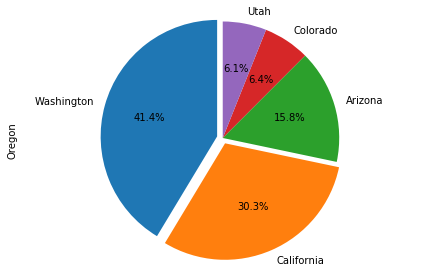

In [28]:
OR_df = Question_df2["Oregon"]
OR_df2 = OR_df.sort_values(ascending=False)
OR_df3 = OR_df2.head(5)

OR_df3.plot.pie(y=OR_df3.index,
           shadow=False,
           colors=None, 
           explode=(0.05, 0.05, 0, 0, 0),   # exploding 'Friday'
           startangle=90,
           autopct='%1.1f%%')

plt.axis('equal')
plt.tight_layout()

# Save the Figure
plt.savefig("Images/OR.png")
plt.show()

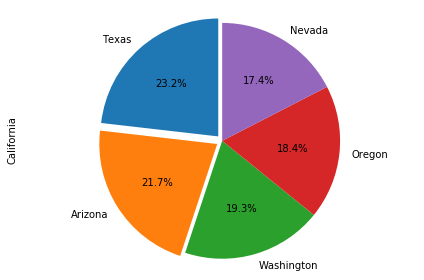

In [29]:
CA_df = Question_df2["California"]
CA_df2 = CA_df.sort_values(ascending=False)
CA_df3 = CA_df2.head(5)

CA_df3.plot.pie(y=CA_df3.index,
           shadow=False,
           colors=None, 
           explode=(0.05, 0.05, 0, 0, 0),   # exploding 'Friday'
           startangle=90,
           autopct='%1.1f%%')

plt.axis('equal')
plt.tight_layout()

# Save the Figure
plt.savefig("Images/CA.png")
plt.show()

In [30]:
NJ_df = Question_df2["New Jersey"]
NJ_df2 = NJ_df.sort_values(ascending=False)
NJ_df3 = NJ_df2.head(5)
NJ_df3

State
Pennsylvania      39487
New York          34953
Florida           27892
California        12906
North Carolina    11559
Name: New Jersey, dtype: int64

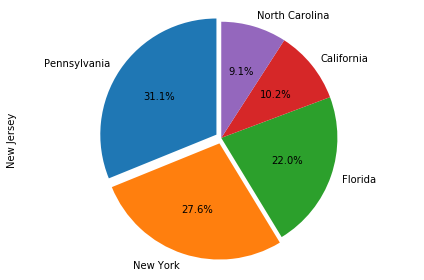

In [31]:
NJ_df3.plot.pie(y=NJ_df3.index,
           shadow=False,
           colors=None, 
           explode=(0.05, 0.05, 0, 0, 0),   # exploding 'Friday'
           startangle=90,
           autopct='%1.1f%%')

plt.axis('equal')
plt.tight_layout()

# Save the Figure
plt.savefig("Images/NJ.png")
plt.show()

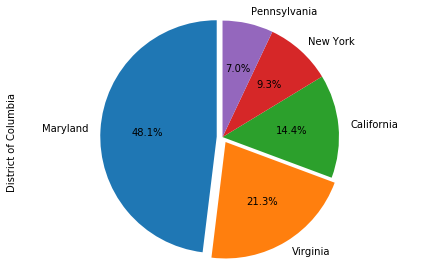

In [32]:
DC_df = Question_df2["District of Columbia "]
DC_df2 = DC_df.sort_values(ascending=False)
DC_df3 = DC_df2.head(5)

DC_df3.plot.pie(y=DC_df3.index,
           shadow=False,
           colors=None, 
           explode=(0.05, 0.05, 0, 0, 0),   # exploding 'Friday'
           startangle=90,
           autopct='%1.1f%%')

plt.axis('equal')
plt.tight_layout()

# Save the Figure
plt.savefig("Images/DC.png")
plt.show()

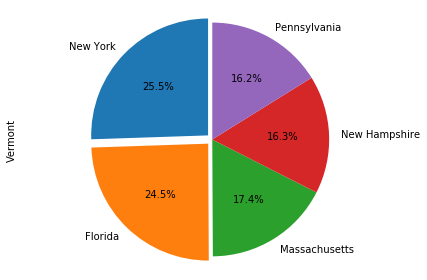

In [33]:
VT_df = Question_df2["Vermont"]
VT_df2 = VT_df.sort_values(ascending=False)
VT_df3 = VT_df2.head(5)

VT_df3.plot.pie(y=VT_df3.index,
           shadow=False,
           colors=None, 
           explode=(0.05, 0.05, 0, 0, 0),   # exploding 'Friday'
           startangle=90,
           autopct='%1.1f%%')

plt.axis('equal')
plt.tight_layout()

# Save the Figure
plt.savefig("Images/VT.png")
plt.show()

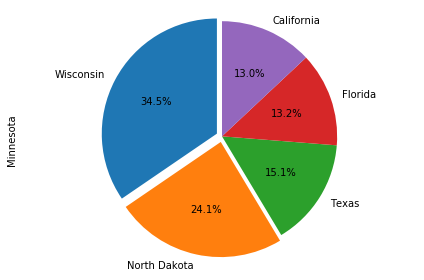

In [34]:
MN_df = Question_df2["Minnesota"]
MN_df2 = MN_df.sort_values(ascending=False)
MN_df3 = MN_df2.head(5)

MN_df3.plot.pie(y=MN_df3.index,
           shadow=False,
           colors=None, 
           explode=(0.05, 0.05, 0, 0, 0),   # exploding 'Friday'
           startangle=90,
           autopct='%1.1f%%')

plt.axis('equal')
plt.tight_layout()

# Save the Figure
plt.savefig("Images/MN.png")
plt.show()

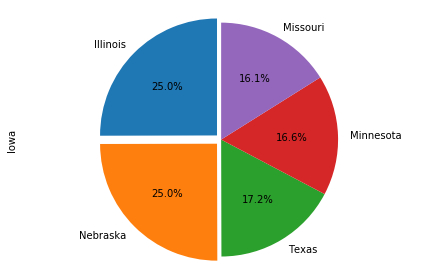

In [35]:
IA_df = Question_df2["Iowa"]
IA_df2 = IA_df.sort_values(ascending=False)
IA_df3 = IA_df2.head(5)

IA_df3.plot.pie(y=IA_df3.index,
           shadow=False,
           colors=None, 
           explode=(0.05, 0.05, 0, 0, 0),   # exploding 'Friday'
           startangle=90,
           autopct='%1.1f%%')

plt.axis('equal')
plt.tight_layout()

# Save the Figure
plt.savefig("Images/IA.png")
plt.show()